![film](https://raw.githubusercontent.com/Mantvydas-data/Programming-for-DA-2021-Proj/main/data/denise-jans-tV80374iytg-unsplash.PNG)

Photo by <a href="https://unsplash.com/@dmjdenise?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Denise Jans</a> on <a href="https://unsplash.com/s/photos/film?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>


# Intro
***
The aim of this project is to simulate dataset that represents real life measurable phenomenon with simulated dataset having at least one hundred data point with at least four different variables. Sinthesised data should have close to real life properties and relationship amongst variables.

# Project description plan
***
During recent wordwide lockdown it became increasingly popular to have a subscription to one of many movie/TV streaming services. These platforms experienced unprecedented growth month on month basis becoming daily habit for most. This project will look into simulating a dataset of fictional movie streaming platform 'MFLIX' usage log with dates, movie stream count per hour, movie category, user ID, user gender and name with surname. Different methods learned during this semester will be used in this project.

# Generating data

In [1]:
# Importing required packages by their orthodox abbreviations
import matplotlib.pyplot as plt # Plotting
import numpy as np # Mathematical arrays
import pandas as pd # Work with data frames
import re # Regular expressions.
import seaborn as sns # Plotting

# Importing Python modules String and Random
import string
import random

# Importing Numpy random generator and assigning it to rng variable
from numpy.random import default_rng

# Seed value 124 is set for reproduceable random data
rng = default_rng(seed=124)

# Dates and times by hour
A date list with hourly timestamp

In [2]:
# Generating a range of dates by the hour

# Count of hourly observations for month of December
periods = 31*24

# Hourly date and time for December
dfdate = pd.date_range('2021-12-01', freq='H', periods=periods)

dfdate

DatetimeIndex(['2021-12-01 00:00:00', '2021-12-01 01:00:00',
               '2021-12-01 02:00:00', '2021-12-01 03:00:00',
               '2021-12-01 04:00:00', '2021-12-01 05:00:00',
               '2021-12-01 06:00:00', '2021-12-01 07:00:00',
               '2021-12-01 08:00:00', '2021-12-01 09:00:00',
               ...
               '2021-12-31 14:00:00', '2021-12-31 15:00:00',
               '2021-12-31 16:00:00', '2021-12-31 17:00:00',
               '2021-12-31 18:00:00', '2021-12-31 19:00:00',
               '2021-12-31 20:00:00', '2021-12-31 21:00:00',
               '2021-12-31 22:00:00', '2021-12-31 23:00:00'],
              dtype='datetime64[ns]', length=744, freq='H')

# Streaming counts - Depends on time of the day. 
***
To have realistic sream data views per hour needs to adhere to time of day to simulate peak-offpeak times of the day. Time serries data will be split by time of the day for random stream data count to be generated having not many streams during late night and early morning hours, medium usage during the day and peak time from 5 PM to 1AM. Streams will be 30% higher on Fridays, where on Saturday and Sunday they will increase to 40% compared to work day usage.

In [3]:
# Creating H column to number each hour sample in the date range 
df= pd.DataFrame({'H': np.arange(len(dfdate))}, index=dfdate)

# Adding column H to df2 dataframe
df2 = df['H']

# Spliting time series by time of the day
night = pd.DataFrame(df.between_time("02:01","06:00"))
morning = pd.DataFrame(df.between_time("06:01","12:00"))
afternoon = pd.DataFrame(df.between_time("12:01","17:00"))
evening = pd.DataFrame(df.between_time("17:01","02:00"))

night

,H
2021-12-01 03:00:00,3
2021-12-01 04:00:00,4
2021-12-01 05:00:00,5
2021-12-01 06:00:00,6
2021-12-02 03:00:00,27
...,...
2021-12-30 06:00:00,702
2021-12-31 03:00:00,723
2021-12-31 04:00:00,724
2021-12-31 05:00:00,725


In [4]:
# Setting time of day clasification as hard value
night['periods'] = 'night'
morning['periods'] = 'morning'
afternoon['periods'] = 'afternoon'
evening['periods'] = 'evening'

In [5]:
# Adding date-time as value instead of index
df['udates'] = df.index
# Populating weekdays for weekend usage to be incremented
df['weekday'] = df.index.weekday

In [6]:
# Setting df index to H for data to be joined based on
df.set_index('H', inplace=True)
df

,udates,weekday
H,,
0,2021-12-01 00:00:00,2
1,2021-12-01 01:00:00,2
2,2021-12-01 02:00:00,2
3,2021-12-01 03:00:00,2
4,2021-12-01 04:00:00,2
...,...,...
739,2021-12-31 19:00:00,4
740,2021-12-31 20:00:00,4
741,2021-12-31 21:00:00,4


In [7]:
# GeneratingrRandom stream counts for different time of the day
# Night streams 0 to 3 per hour
night['streams'] = rng.integers(0, 3, len(night))
# Morning streams 2 to 10 per hour
morning['streams'] = rng.integers(2, 10, len(morning))
# Afternoon streams 8 to 20 per hour
afternoon['streams'] = rng.integers(8, 20, len(afternoon))
# Evening streams 20 to 35 per hour
evening['streams'] = rng.integers(20, 35, len(evening))

In [8]:
evening

,H,periods,streams
2021-12-01 00:00:00,0,evening,23
2021-12-01 01:00:00,1,evening,28
2021-12-01 02:00:00,2,evening,27
2021-12-01 18:00:00,18,evening,24
2021-12-01 19:00:00,19,evening,25
...,...,...,...
2021-12-31 19:00:00,739,evening,22
2021-12-31 20:00:00,740,evening,28
2021-12-31 21:00:00,741,evening,25
2021-12-31 22:00:00,742,evening,32


In [9]:
# Joining time periods
# Setting index to H for all
night.set_index('H', inplace=True)
morning.set_index('H', inplace=True)
afternoon.set_index('H', inplace=True)
evening.set_index('H', inplace=True)

In [10]:
# Appending time of the day dataframes to be joined together
night = night.append(morning)
night = night.append(afternoon)
night = night.append(evening)
night

,periods,streams
H,,
3,night,2
4,night,2
5,night,2
6,night,2
27,night,1
...,...,...
739,evening,22
740,evening,28
741,evening,25


In [11]:
# Joining values together on indexed H column
df = df.join(night, how='outer')

In [12]:
# Increasing weekend views to additional 30% on Fri and 40%- Sat, Sun
# Also, rounding to int 
df['streams'] = np.rint(np.where(df['weekday'] == 4, df['streams'] * 1.3, df['streams']))
df['streams'] = np.rint(np.where((df['weekday'] == 5) | (df['weekday'] == 6), df['streams'] * 1.4, df['streams']))

In [13]:
df

,udates,weekday,periods,streams
H,,,,
0,2021-12-01 00:00:00,2,evening,23.0
1,2021-12-01 01:00:00,2,evening,28.0
2,2021-12-01 02:00:00,2,evening,27.0
3,2021-12-01 03:00:00,2,night,2.0
4,2021-12-01 04:00:00,2,night,2.0
...,...,...,...,...
739,2021-12-31 19:00:00,4,evening,29.0
740,2021-12-31 20:00:00,4,evening,36.0
741,2021-12-31 21:00:00,4,evening,32.0


# User ID

User ID will be generated chosing two letters followed by three random numbers, 50 active users from Ireland will have User IDs assigned.

In [14]:
# Setting uid list
uid=[]
# letters=''.join(random.choices(string.ascii_uppercase,k=2))
# digits=''.join(random.choices(string.digits,k=3))
# Setting random seed for Python Random method
random.seed(124)

# A for loop for radom 2 letter asn random 3 digits to be generated as user ID
for i in range(50):
    uid.append(''.join(random.choices(string.ascii_uppercase,k=2)) + ''.join(random.choices(string.digits,k=3)))
            
          
# Creating df2 dataframe with 50 user numbered
df2= pd.DataFrame({'N': np.arange(50)})

# Adding generated user IDs to df2
df2['uid'] = uid

df2.head(10)  

,N,uid
0,0,YO194
1,1,UA198
2,2,AM421
3,3,ID183
4,4,HK195
5,5,RZ154
6,6,TP415
7,7,UY458
8,8,LK787
9,9,YE509


# User gender

Gender will be populated for User IDs that will determine user name

In [15]:
# A list of genders
gender = ['female', 'male']

# Random selection of gender for 50 users we have
df2['ugender'] = rng.choice(gender ,size=(len(df2)))
df2.head(10)

,N,uid,ugender
0,0,YO194,male
1,1,UA198,female
2,2,AM421,male
3,3,ID183,female
4,4,HK195,male
5,5,RZ154,male
6,6,TP415,female
7,7,UY458,female
8,8,LK787,male
9,9,YE509,female


In [16]:
# Checking gender distribution
df2['ugender'].value_counts()

male      28
female    22
Name: ugender, dtype: int64

# User Name
***
User name will be selected from list of popular Irish names depending on gender variable assigned previously.
Names will be retrieved from [Irishcentral](https://www.irishcentral.com/roots/100-irish-language-first-names-meanings) website by using regular expressions to extract it, if not sucessful manual list in CSV/Excel format will be prepared to be read for random selection.

To reproduce Names file in text format:
1. Open the website link
2. Press Control+p (opens printable wersion with less adds)
3. Control+a followed by Control+c
4. open new text document with editor of choice
5. Contol+v inside the file.
6. Save txt file in project location, data folder as names.txt


https://www.irishcentral.com/roots/100-irish-language-first-names-meanings

In [17]:
# Regular expressions.
import re

In [18]:
with open('data/names.txt', 'r', encoding="utf8" ) as f2:
    data = f2.read()
    print(data)

12/30/21, 9:25 PM 100 Irish first names and their beautiful meanings
https://www.irishcentral.com/roots/100-irish-language-first-names-meanings 1/12
100 Irish first names and their beautiful meanings
Need to find an Irish name quick? Here are the top 100.
Kayla Hertz @IrishCentral May 02, 2021
Have a wee one on the way? Check out these Irish names. GETTY
Looking for an Irish name for a little bundle of joy on the way or justinspired by the beauty of
Irish names and their meanings? Here are 100 ideas for you!
Here are today's 100 most popular Irish language baby names, with their meanings and
pronunciations - 50 girl names and 50 boy names. See if yours made the cut, or peruse the list for
some inspiration!
Irish Girls Names:
1. Aoife (ee-fa)
This name means beautiful, radiant or joyful, and likely derives from the Gaelic word ‘aoibh’
meaning ‘beauty’ or ‘pleasure.’ In Irish mythology, Aoife is known as the greatest woman warrior in
the world. She gave birth to the mythological hero Cuc

In [19]:
# Compile the regular expression for matching patern.
re_names = re.compile(r'[0-9]+\.\s[A-Za-z]+')

In [20]:
result = re.findall(re_names, data)
result[:10]

['100.\nKayla',
 '1. Aoife',
 '2. Caoimhe',
 '3. Saoirse',
 '4. Ciara',
 '5. Niamh',
 '6. Roisin',
 '7. Cara',
 '8. Clodagh',
 '9. Aisling']

In [21]:
# Updating list to dataframe
namesdf = pd.DataFrame({'names':result})

# Replacing '\n' with ' '
namesdf.replace(regex=['\n'], value=' ', inplace= True)

Names need to be split from the numbers in the string, it is split as string on space between numbers and names.

In [22]:
# Spliting strings on space
tosplit =namesdf['names'].str.split(' ')
# Saving result as a list
split = tosplit.to_list()

# List is saved as two columns in a dataframe allowing for clean names under single column
splitnames= pd.DataFrame(split, columns= ['numbers','names'])

In [23]:
# Dropping numbers column as not required
splitnames= splitnames.drop(['numbers'], axis=1)

In [24]:
# Slicing names to female and male
female= splitnames.iloc[1:50]
male= splitnames.iloc[51:100]
male.head()

,names
51,Conor
52,Sean
53,Oisin
54,Patrick
55,Cian


In [25]:
# Random selection of Irish names based on gender specified 
df2['uname'] = [rng.choice(female['names']) if x == 'female' else rng.choice(male['names']) for x in df2['ugender']]

df2.head(10)

,N,uid,ugender,uname
0,0,YO194,male,Niall
1,1,UA198,female,Fionnuala
2,2,AM421,male,Eoghan
3,3,ID183,female,Ciara
4,4,HK195,male,Aodhan
5,5,RZ154,male,Aidan
6,6,TP415,female,Cara
7,7,UY458,female,Dearbhla
8,8,LK787,male,Killian
9,9,YE509,female,Riona


# Joining all the data

Data will be joined together indexing one of data variables, data neds to be melted and rearanged to get date stamp for each view rather count of views on specified hour.

***

In [26]:
# Expanding the dataframe to have value line for each stream in an hour
fulldf = pd.DataFrame(df.values.repeat(df.streams, axis=0), columns=df.columns)
fulldf

,udates,weekday,periods,streams
0,2021-12-01 00:00:00,2,evening,23.0
1,2021-12-01 00:00:00,2,evening,23.0
2,2021-12-01 00:00:00,2,evening,23.0
3,2021-12-01 00:00:00,2,evening,23.0
4,2021-12-01 00:00:00,2,evening,23.0
...,...,...,...,...
12437,2021-12-31 23:00:00,4,evening,31.0
12438,2021-12-31 23:00:00,4,evening,31.0
12439,2021-12-31 23:00:00,4,evening,31.0
12440,2021-12-31 23:00:00,4,evening,31.0


In [27]:
# Selecting N value for each observation that will be used as index to join data
fulldf['N']= rng.choice(df2['N'],size=(len(fulldf)))
fulldf

,udates,weekday,periods,streams,N
0,2021-12-01 00:00:00,2,evening,23.0,44
1,2021-12-01 00:00:00,2,evening,23.0,14
2,2021-12-01 00:00:00,2,evening,23.0,2
3,2021-12-01 00:00:00,2,evening,23.0,30
4,2021-12-01 00:00:00,2,evening,23.0,9
...,...,...,...,...,...
12437,2021-12-31 23:00:00,4,evening,31.0,6
12438,2021-12-31 23:00:00,4,evening,31.0,26
12439,2021-12-31 23:00:00,4,evening,31.0,33
12440,2021-12-31 23:00:00,4,evening,31.0,21


In [28]:
# Setting 'N' (numner of users) as index for both dataframes
df2.set_index('N', inplace=True)
fulldf.set_index('N', inplace=True)

In [29]:
# Joining df2 to fulldf
fulldf = fulldf.join(df2)

# Movie/TV-Series Category
***
Movie - TV Series category will be randomly assigned to views data from list variable containing available categories on the platform. Category has to be assigned last for each stream per hour to have real life setting.

In [30]:
# Setting available movie/TV series categories
categories = ['Action', 'Comedy', 'Drama', 'Fantasy', 'Horror', 'Mystery', 'Romance', 'Thriller', 'Western']
# Setting probabily for each category
probability = [0.06, 0.14, 0.2, 0.18, 0.02, 0.12, 0.16, 0.02, 0.1]

fulldf['categories'] = rng.choice(categories,size=(len(fulldf)), p=probability)

# Saving Dataset

In [31]:
# Saving generated dataset as Excel file
fulldf.to_excel('data/finaldata1.xlsx')

In [32]:
fulldf

,udates,weekday,periods,streams,uid,ugender,uname,categories
N,,,,,,,,
0,2021-12-01 01:00:00,2,evening,28.0,YO194,male,Niall,Fantasy
0,2021-12-01 11:00:00,2,morning,7.0,YO194,male,Niall,Action
0,2021-12-01 13:00:00,2,afternoon,11.0,YO194,male,Niall,Comedy
0,2021-12-01 16:00:00,2,afternoon,9.0,YO194,male,Niall,Drama
0,2021-12-01 22:00:00,2,evening,34.0,YO194,male,Niall,Comedy
...,...,...,...,...,...,...,...,...
49,2021-12-31 18:00:00,4,evening,39.0,HZ669,male,Eoin,Drama
49,2021-12-31 20:00:00,4,evening,36.0,HZ669,male,Eoin,Action
49,2021-12-31 21:00:00,4,evening,32.0,HZ669,male,Eoin,Drama


# Data overview and analysis/plots

In [33]:
print("Dimensions of MFLIX dataset is: rows {} columns." .format(fulldf.shape))

Dimensions of MFLIX dataset is: rows (12442, 8) columns.


In [34]:
fulldf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12442 entries, 0 to 49
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   udates      12442 non-null  datetime64[ns]
 1   weekday     12442 non-null  object        
 2   periods     12442 non-null  object        
 3   streams     12442 non-null  object        
 4   uid         12442 non-null  object        
 5   ugender     12442 non-null  object        
 6   uname       12442 non-null  object        
 7   categories  12442 non-null  object        
dtypes: datetime64[ns](1), object(7)
memory usage: 874.8+ KB


In [35]:
fulldf.describe(include='all', datetime_is_numeric=True)

,udates,weekday,periods,streams,uid,ugender,uname,categories
count,12442,12442.0,12442,12442.0,12442,12442,12442,12442
unique,NaN,7.0,4,46.0,50,2,38,9
top,NaN,4.0,evening,29.0,DN330,male,Killian,Drama
freq,NaN,2302.0,8629,725.0,292,6970,733,2391
mean,2021-12-16 12:09:20.745860864,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2021-12-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2021-12-08 19:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2021-12-16 19:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2021-12-24 14:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,2021-12-31 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
fulldf['ugender'].value_counts()

male      6970
female    5472
Name: ugender, dtype: int64

In [37]:
fulldf['categories'].value_counts()

Drama       2391
Fantasy     2279
Romance     2007
Comedy      1818
Mystery     1417
Western     1261
Action       761
Thriller     269
Horror       239
Name: categories, dtype: int64

In [38]:
fulldf['periods'].value_counts()

evening      8629
afternoon    2459
morning      1204
night         150
Name: periods, dtype: int64

In [39]:
fulldf['weekday'].value_counts()

4    2302
6    1978
5    1935
3    1714
2    1713
1    1429
0    1371
Name: weekday, dtype: int64

In [66]:
# views by time of the week kde line plot or time series line plot
# Slicing one weeks data from 19/12/2021 to 26/12/2021
week3 = fulldf[(fulldf['udates'] > '2021-12-20') & (fulldf['udates'] <= '2021-12-27')]


In [64]:
week3['categories'].value_counts()

Drama       567
Fantasy     489
Romance     488
Comedy      403
Mystery     332
Western     271
Action      186
Thriller     67
Horror       64
Name: categories, dtype: int64

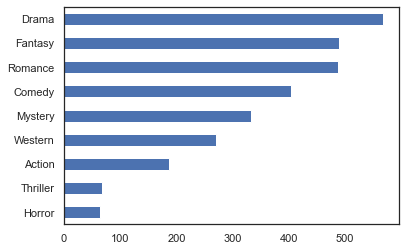

In [65]:

#plt.bar(x, week3['categories'].value_counts())
week3.categories.value_counts().sort_values().plot(kind = 'barh')
plt.show()

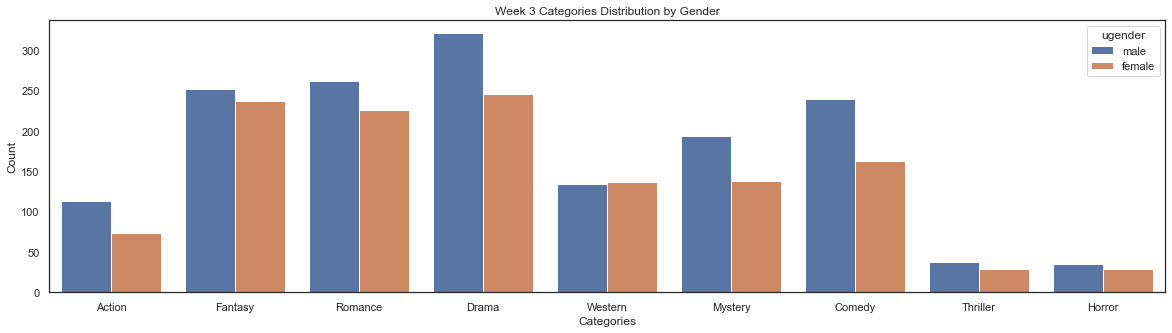

In [70]:
# Seaborn plot style- white
sns.set_theme(style="white")
plt.figure(figsize=(20,5))



sns.countplot(x="categories", hue="ugender", data=week3)
plt.title('Week 3 Categories Distribution by Gender')
plt.xlabel("Categories")
plt.ylabel("Count")

plt.show()

[Text(0, 0, 'Mon'),
 Text(1, 0, 'Tue'),
 Text(2, 0, 'Wed'),
 Text(3, 0, 'Thu'),
 Text(4, 0, 'Fri'),
 Text(5, 0, 'Sat'),
 Text(6, 0, 'Sun')]

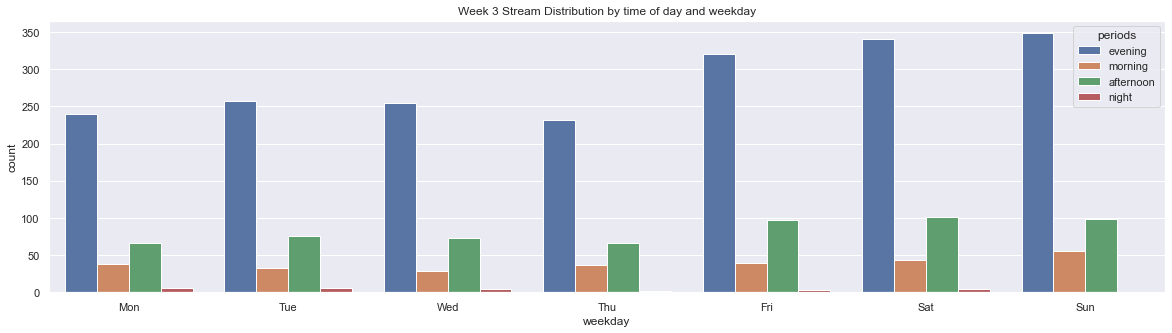

In [103]:
# Seaborn plot style- white
sns.set_theme(style="darkgrid")
plt.figure(figsize=(20,5))
labels= ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']


ax = sns.countplot(x="weekday", hue="periods", data=week3)
plt.title('Week 3 Stream Distribution by time of day and weekday')
ax.set_xticklabels(labels)
#plt.xticks(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
#plt.xticks(['0', '1', '2', '3', '4', '5', '6'], ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
#ax.set(xticks=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
#plt.xticks(fulldf['periods'].value_counts() , labels, rotation='vertical')

In [71]:
week3

,udates,weekday,periods,streams,uid,ugender,uname,categories
N,,,,,,,,
0,2021-12-20 01:00:00,0,evening,23.0,YO194,male,Niall,Action
0,2021-12-20 02:00:00,0,evening,29.0,YO194,male,Niall,Fantasy
0,2021-12-20 02:00:00,0,evening,29.0,YO194,male,Niall,Romance
0,2021-12-20 09:00:00,0,morning,6.0,YO194,male,Niall,Drama
0,2021-12-20 11:00:00,0,morning,9.0,YO194,male,Niall,Western
...,...,...,...,...,...,...,...,...
49,2021-12-26 20:00:00,6,evening,28.0,HZ669,male,Eoin,Romance
49,2021-12-26 21:00:00,6,evening,43.0,HZ669,male,Eoin,Comedy
49,2021-12-26 22:00:00,6,evening,43.0,HZ669,male,Eoin,Drama


In [ ]:
pie plot for most streamed movie categories by gender 

In [ ]:
average week day views vs average weekend views?

In [ ]:
bar plot for one weeks streams

In [ ]:
# Pie plot of top 5 categories 

# Bibliography

https://stackoverflow.com/questions/41598916/resize-the-image-in-jupyter-notebook-using-markdown

https://stackoverflow.com/questions/41598916/resize-the-image-in-jupyter-notebook-using-markdown

https://stackoverflow.com/questions/56310849/generate-random-timeseries-data-with-dates

https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html

https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html

https://numpy.org/doc/stable/reference/generated/numpy.rint.html


https://stackoverflow.com/questions/28009370/get-weekday-day-of-week-for-datetime-column-of-dataframe

https://pandas.pydata.org/pandas-docs/version/0.17.1/merging.html

https://www.stackvidhya.com/pandas-iterate-over-rows/

https://datagy.io/pandas-conditional-column/

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.itertuples.html

https://www.geeksforgeeks.org/how-to-generate-a-random-letter-in-python/

https://stackoverflow.com/questions/2823316/generate-a-random-letter-in-python

https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html

https://www.tutorialspoint.com/python/string_decode.html

https://docs.python.org/3/library/re.html#re.search

https://careerkarma.com/blog/python-valueerror-io-operation-on-closed-file/

https://www.programiz.com/python-programming/file-operation

https://www.kite.com/python/answers/how-to-split-a-pandas-dataframe-column-in-python